In [1]:
!pip install tensorflow

  You can safely remove it manually.
  You can safely remove it manually.



  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
  Using cached wheel-0.44.0-py3-none-any.whl.metadata (2.3 kB)
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 1.8/385.2 MB 12.6 MB/s eta 0:00:31
   ---------------------------------------- 3.1/385.2 MB 8.4 MB/s eta 0:00:46
   ---------------------------------------- 3.9/385.2 MB 7.3 MB/s eta 0:00:52
    --------------------------------------- 5.2/385.2 MB 6.6 MB/s eta 0:00:58
    --------------------------------------- 6.8/385.2 MB 7.0 MB/s eta 0:00:55
    --------------------------------------- 7.6/385.2 MB 6.7 MB/s eta 0:00:57
    --------------------------------------- 8.7/385.2 MB 6.0 MB/s eta 0:01:03
    --------------------------------------- 9.2/385.2 MB 5.8 MB/s eta 0:01:06
   - -------------------------------------- 10.0/385.2 MB 5.4 MB/s eta 0:01:11
   - -------------------------------------- 10.5/385.2 MB 5.2 MB/s eta 0:01:13
   - ------

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data to include a channel dimension (for grayscale images)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


# Step 2: Building the CNN Model

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build a simple CNN model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the layers
model.add(Flatten())

# Add a dense fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting

# Output layer for classification
model.add(Dense(10, activation='softmax'))  # 10 classes for digits 0-9


d:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Step 3: Compiling and Training the Model

In [4]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.7991 - loss: 0.6314 - val_accuracy: 0.9788 - val_loss: 0.0628
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.9678 - loss: 0.1062 - val_accuracy: 0.9866 - val_loss: 0.0393
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9781 - loss: 0.0731 - val_accuracy: 0.9895 - val_loss: 0.0331
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9814 - loss: 0.0634 - val_accuracy: 0.9892 - val_loss: 0.0299
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9852 - loss: 0.0475 - val_accuracy: 0.9910 - val_loss: 0.0255
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9870 - loss: 0.0437 - val_accuracy: 0.9900 - val_loss: 0.0280
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.9883 - loss: 0.0387 - val_accuracy: 0.9902 - val_loss: 0.0275
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9901 - loss: 0.0331 - 

# Step 4: Evaluating the Model

In [28]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9888 - loss: 0.0337
Test accuracy: 0.9910


# Step 5: Making Predictions on Test Data

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


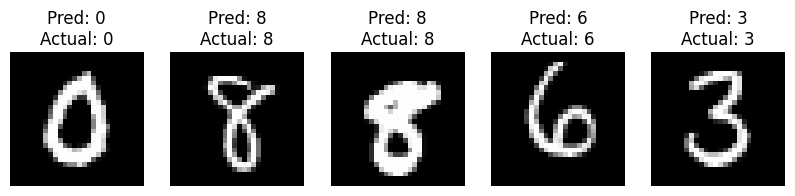

In [29]:
# Making predictions
predictions = model.predict(x_test)

# Convert predictions from one-hot encoding to the corresponding digit
predicted_classes = predictions.argmax(axis=1)
actual_classes = y_test.argmax(axis=1)

# Display 5 random test images with their predicted and actual labels
import matplotlib.pyplot as plt
import numpy as np

# Select 5 random indices from the test dataset
random_indices = np.random.choice(len(x_test), 5, replace=False)

plt.figure(figsize=(10, 5))  # Set figure size
for i, index in enumerate(random_indices):
    plt.subplot(1, 5, i + 1)  # 1 row, 5 columns for 5 images
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_classes[index]}\nActual: {actual_classes[index]}")
    plt.axis('off')  # Turn off axis lines
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


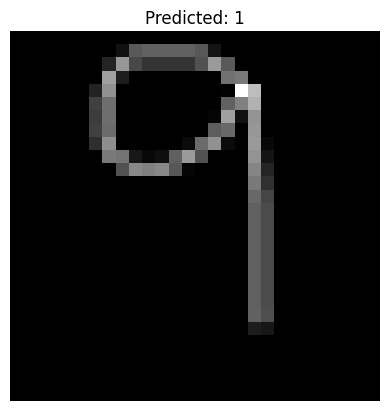

The predicted digit is: 1


In [37]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Function to preprocess the input image
def preprocess_image(img_path):
    # Load the image
    img = Image.open(img_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to 28x28 pixels
    
    # Invert the colors if necessary (ensure background is black, digits are white)
    img = np.invert(img)
    
    # Normalize the image to 0-1 range
    img = np.array(img).astype('float32') / 255.0
    
    # Reshape the image to add the batch dimension and channel (for grayscale)
    img = img.reshape(1, 28, 28, 1)
    
    return img

# Function to predict the digit in the image
def predict_digit(img_path):
    # Preprocess the image
    processed_img = preprocess_image(img_path)
    
    # Predict the digit using the trained model
    prediction = model.predict(processed_img)
    
    # Get the predicted class (the digit)
    predicted_digit = np.argmax(prediction)
    
    # Display the image with the predicted label
    plt.imshow(processed_img.reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_digit}")
    plt.axis('off')
    plt.show()
    
    return predicted_digit

# Path to the input image (PNG file)
img_path = 'sp_9.png'

# Predict the digit in the image
predicted_digit = predict_digit(img_path)
print(f"The predicted digit is: {predicted_digit}")
